In [2]:
import pandas as pd
import re
from docx import Document 
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from datetime import datetime

In [2]:
# Load the Excel file into a DataFrame
df = pd.read_excel('Cleaned_Upto2014.xlsx')

# Extract the "Time" and "Body" columns
time_body_df = df[['Time', 'Body']]

# Create a new Word document
doc = Document()

# Iterate over each row of the DataFrame and write the "Time" and "Body" content to the Word document
for index, row in time_body_df.iterrows():
    time = row['Time']
    body = row['Body']
    doc.add_paragraph(f'Time: {time}\n{body}\n')
    doc.add_paragraph('\n')  # Add an empty line to separate each article

# Save the Word document
output_path = 'Upto2014_Document.docx'  # Modify this to the actual save path
doc.save(output_path)

print(f'Data has been successfully written to {output_path}')


Data has been successfully written to Upto2014_Document.docx


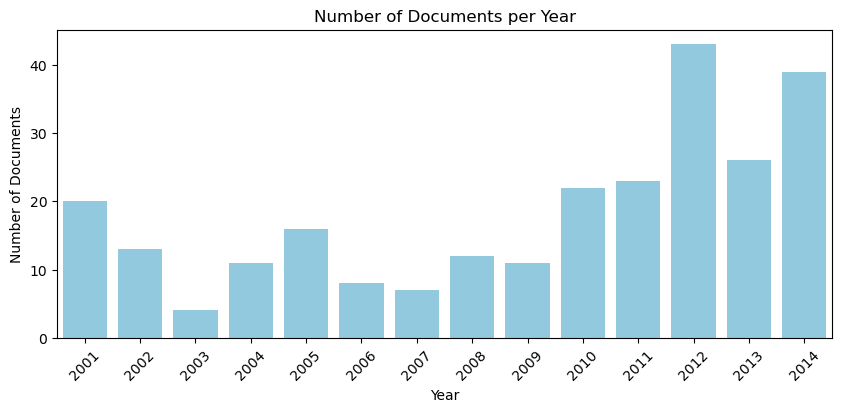

In [8]:
# Ensure the 'Time' column is in datetime format
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Extract the year from the 'Time' column
df['Year'] = df['Time'].dt.year

# Count the number of documents per year
yearly_counts = df['Year'].value_counts().sort_index()

# Plot a bar chart to show the number of documents per year
import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(10, 4))
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, color='skyblue')
plt.title('Number of Documents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.show()


In [4]:
# Load the Excel file
df = pd.read_excel('Coded_Upto2014.xlsx')

# Count the number of occurrences of each topic in the "Topics" column
topic_counts = df['Topics'].value_counts()

# Calculate the percentage of each topic and multiply by 100 to get percentage format
topic_percentage = df['Topics'].value_counts(normalize=True).mul(100)

# Round the percentages to one decimal place
rounded_percentage = topic_percentage.round(1)

# Calculate the difference from the total sum (should be 100%)
difference = 100 - rounded_percentage.sum()

# Add the difference to the largest percentage item to correct rounding issues
rounded_percentage.iloc[0] += difference

# Combine the counts and percentages into a single DataFrame
topic_stats = pd.DataFrame({'Count': topic_counts, 'Percentage (%)': rounded_percentage})

# Print the statistical results
print(topic_stats)



                           Count  Percentage (%)
Topics                                          
Technical Progress            90            35.3
Culture and Entertainment     52            20.4
Future Speculations           20             7.8
Corporate News                19             7.5
Risk and Concerns             16             6.3
Economy and Market            14             5.5
Human-Machine Competition     14             5.5
Researchers                   12             4.7
Education                     10             3.9
Politics and Military          8             3.1


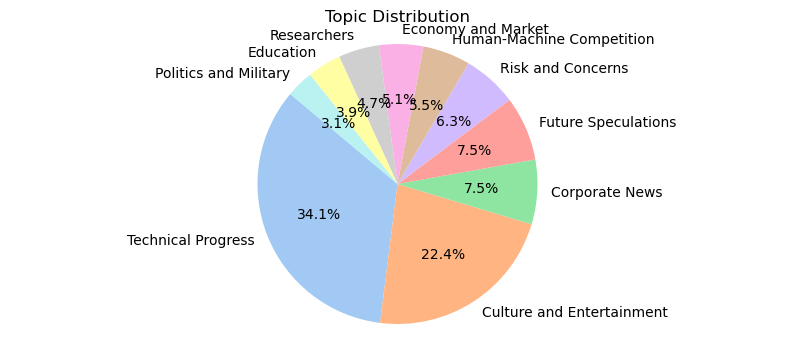

In [5]:
# Set the Seaborn color palette
colors = sns.color_palette('pastel', len(topic_counts))

# Plot a pie chart
plt.figure(figsize=(10, 4))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Topic Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Display the pie chart
plt.show()
